<a href="https://colab.research.google.com/github/PratyushSinha8/customer_segmentation/blob/main/K_Means_Age_vs_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import  KMeans
%matplotlib inline

In [ ]:
df=pd.read_csv("income.csv")

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


[]

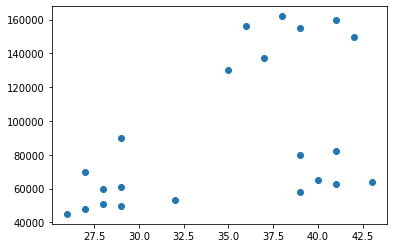

In [ ]:
plt.scatter(df['Age'], df['Income($)'])
plt.plot()

In [ ]:
#Deciding no. of parameters
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Fit and Predict
y_predict= km.fit_predict(df[['Age', 'Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
#Adding cluster value to a column
df['cluster']=y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


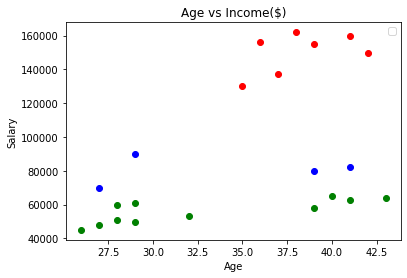

In [ ]:
#Visualizing scatter plot with different clusters colored differently

df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

plt.scatter(df1['Age'], df1['Income($)'], color='Green')
plt.scatter(df2['Age'], df2['Income($)'], color='Red')
plt.scatter(df3['Age'], df3['Income($)'], color='Blue')
plt.title('Age vs Income($)')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
#Scaling of features req to solve problem above
#Hence we use some pre-procressing in the form of min mix scalar
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df


,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [ ]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_predict= km.fit_predict(df[['Age', 'Income($)']])
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df.drop(labels='cluster',axis=1 ,inplace=True)


In [ ]:
df['Cluster']=y_predict
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
y_centers=km.cluster_centers_
y_centers

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

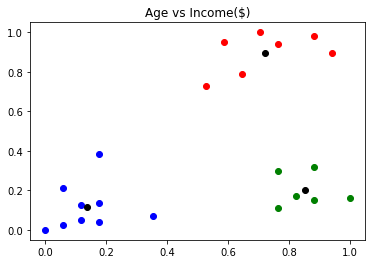

In [ ]:
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]

plt.scatter(df1['Age'], df1['Income($)'], color='Blue')
plt.scatter(df2['Age'], df2['Income($)'], color='Red')
plt.scatter(df3['Age'], df3['Income($)'], color='Green')
plt.scatter(y_centers[:, 0],y_centers[:, 1], color='Black')


plt.title('Age vs Income($)')
plt.show()


In [ ]:
#Elbow-Plot Method

krange=range(1,10)
sse=[] #will store the array of sum of squared errors
for i in krange:
  km=KMeans(n_clusters=i)
  km.fit_predict(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.21055478995472493,
 0.16869711728567788,
 0.13265419827245162,
 0.11404948601588949]

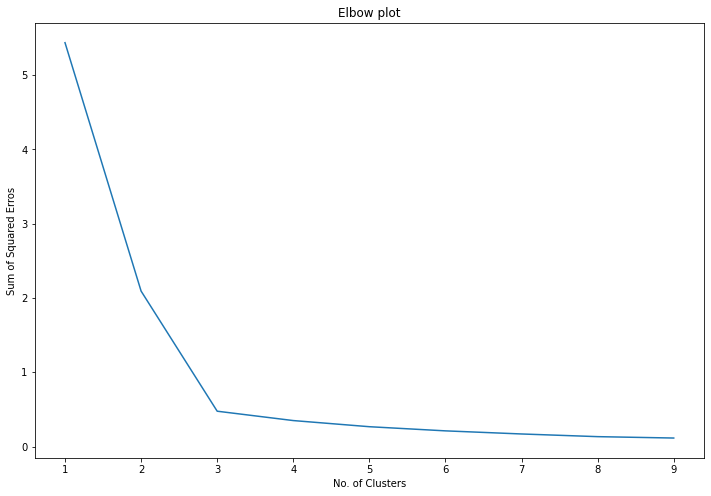

In [ ]:
#plotting sse vs no. of clusters to check if 3 is the right choice

plt.figure(figsize=(12,8))
plt.plot(krange,sse )
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of Squared Erros')

plt.title('Elbow plot')
plt.show()